# What's Possible in Python?

# Python Data Science Ecosystem

<img src="images/pydata.png" alt="PyData" width="600">

# General Programming Tasks

<table border="1">
  <tr style="border: 1px solid black">
    <td style="border: 1px solid black">8</td>
    <td style="border: 1px solid black">9</td>
    <td style="border: 1px solid black">10</td>
    <td style="border: 1px solid black">11</td>
  </tr>
  <tr style="border: 1px solid black">
    <td style="border: 1px solid black">4</td>
    <td style="border: 1px solid black">5</td>
    <td style="border: 1px solid black">6</td>
    <td style="border: 1px solid black">7
    </td>
  </tr>
  <tr style="border: 1px solid black">
    <td style="border: 1px solid black">0</td>
    <td style="border: 1px solid black">1</td>
    <td style="border: 1px solid black">2</td>
    <td style="border: 1px solid black">3</td>
  </tr>
</table>

In [1]:
def pentadiagonal(Nx, Ny):

    A = [[0 for i in range(Nx*Ny)] for i in range(Nx*Ny)]

    for i in range(Nx*Ny):
        
        if i+1 > Nx:
            A[i][i-Nx] = -1

        if i+1 <= Nx*(Ny-1):
            A[i][i+Nx] = -1

        if (i+1) % Nx != 0:
            A[i][i+1] = -1
            
        if (i+1) % Nx != 1:
            A[i][i-1] = -1
        
        A[i][i] = abs(sum(A[i]))

    return A

pentadiagonal(3,3)

[[2, -1, 0, -1, 0, 0, 0, 0, 0],
 [-1, 3, -1, 0, -1, 0, 0, 0, 0],
 [0, -1, 2, 0, 0, -1, 0, 0, 0],
 [-1, 0, 0, 3, -1, 0, -1, 0, 0],
 [0, -1, 0, -1, 4, -1, 0, -1, 0],
 [0, 0, -1, 0, -1, 3, 0, 0, -1],
 [0, 0, 0, -1, 0, 0, 2, -1, 0],
 [0, 0, 0, 0, -1, 0, -1, 3, -1],
 [0, 0, 0, 0, 0, -1, 0, -1, 2]]

# Excel-like tasks

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
from intake import cat

df = pd.read_csv('datasets/200wells.csv') 
df['porosity type'] = np.where(df['porosity'] > 0.12, 'high', 'low')
df.head()

,X,Y,facies_threshold_0.3,porosity,permeability,acoustic_impedance,porosity type
0,565,1485,1,0.1184,6.170,2.009,low
1,2585,1185,1,0.1566,6.275,2.864,high
2,2065,2865,2,0.1920,92.297,3.524,high
3,3575,2655,1,0.1621,9.048,2.157,high
4,1835,35,1,0.1766,7.123,3.979,high


## Create pivot table (median aggregation)

In [3]:
pd.pivot_table(df[['porosity', 'porosity type']], columns='porosity type', aggfunc=np.median)

porosity type,high,low
porosity,0.1579,0.1026


# Plotting / Curve Fitting

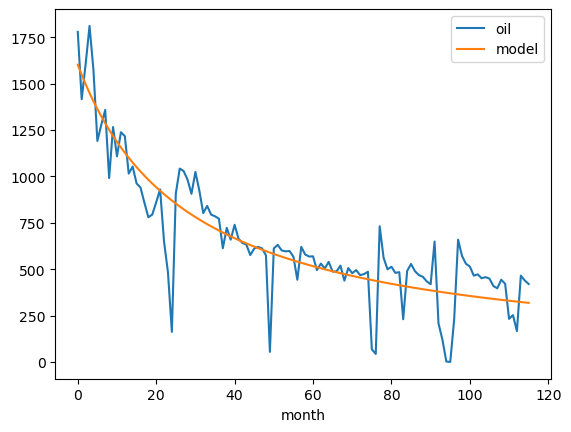

In [4]:
import scipy.optimize
df = pd.read_csv('datasets/33013014020000.csv')
df.set_index(['date'])
months = df.index.to_numpy()
oil = df['volume_oil_formation_bbls'].interpolate(method='polynomial', order=1).to_numpy()
model = lambda t, q_i, D, b: q_i / (1 + b * D * t) ** (1 / b)
parameters, _ = scipy.optimize.curve_fit(model, months, oil, bounds=[[0, 0, 0], [np.inf, np.inf, 1]])
df = pd.DataFrame({'month': months, 'oil': oil, 'model': model(months, *parameters)}).set_index(['month'])
df.plot();

# Interactive Dashboards

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import panel
import panel.widgets as pnw
panel.extension()#comms='ipywidgets')

Row
    [0] ParamFunction(function, _pane=Matplotlib, defer_load=False)
    [1] Column
        [0] Markdown(str)
        [1] Select(name='API', options=['33007000110000', ...], value='33007000110000')
        [2] Select(name='Reservoir Fluid', options=['oil', 'gas'], value='oil')
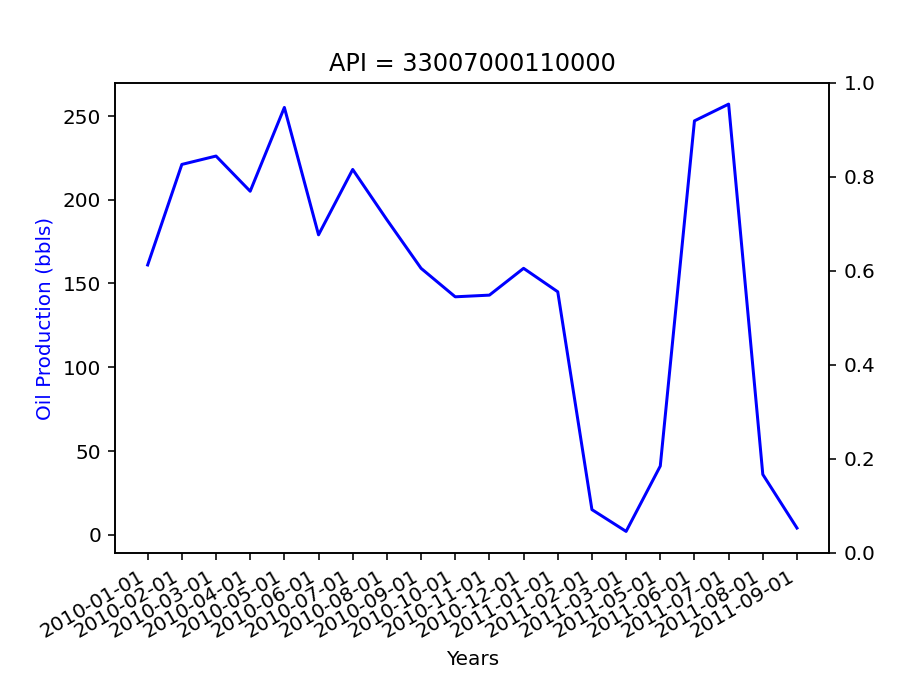

In [6]:
api  = panel.widgets.Select(name='API', options=['33007000110000','33007000140000'])
og = panel.widgets.Select(name='Reservoir Fluid', options=['oil','gas'])

@panel.depends(api.param.value, og.param.value)
def create_plot(API, oil_or_gas='oil'):
    fig, ax1 = plt.subplots()
    df = pd.read_csv(f'datasets/production_{API}.csv').set_index(['date'])
    if oil_or_gas == 'oil':
        liquid = df['volume_oil_formation_bbls'].values
        ax1.set_ylabel('Oil Production (bbls)', color='b')
    if oil_or_gas == 'gas':
        liquid = df['volume_gas_formation_mcf'].values
        ax1.set_ylabel('Gas Production (mcf)', color='b')
    dates = df.index.values
    
    ax2 = ax1.twinx()
    ax1.plot(dates, liquid, 'b')
    ax1.set_xlabel('Years')
    ax1.set_title('API = {}'.format(API))
    fig.autofmt_xdate()
    plt.close(fig)
    return fig

widgets    = panel.Column("**Select API and Reservoir Liquid:**", api, og)
side_panel = panel.Row(create_plot, widgets)

side_panel

# Highly Interactive Visualizations

In [7]:
import IPython
IPython.display.IFrame(src="https://johnfoster.pge.utexas.edu/files/nd_production.html", width=510, height=655)

In [8]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)

<IPython.core.display.Javascript object>